## Looking at all tanks from 25MT03 and 04 - 10 tonne Capacity 

In [2]:
#Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Supress Warnings
import warnings 
warnings.filterwarnings('ignore')
#The last line of code helps in suppressing the unnecessary warnings.
from scipy import stats
import seaborn as sns

In [3]:
# Set global font settings
plt.rc('axes', titlesize=16, titleweight='bold', labelsize=14, labelweight='bold')  # For axes title and labels
plt.rc('xtick', labelsize=12)  # For x-axis tick labels
plt.rc('ytick', labelsize=12)  # For y-axis tick labels


In [4]:
# Using the Specify Absolute Path: If the file is located in a different directory, you can specify the absolute path to the file when reading it using pd.read_csv():
import pandas as pd
file_path = r'C:\Users\User\Desktop\Thesis 2023\Capstone---CCT\Python Working Notebooks\ProductionDataupdated1.csv'
ProductionTank = pd.read_csv(file_path)

In [5]:
ProductionTank

,Unnamed: 0,Material,BATCHID,Tank_1,Instruction_Step,INGRED_ID,INGRED_Name,Quantity,Phase_start,Phase_end,Phase_duration,Phase_start_delay,Phase_row_no,Flowrate_KGMIN,Target_Flowrate,Target_Phase_duration,Phase_overrun,Deaeration Phase
0,0,1002150,107643491,2503,S3_BATCH_IN_PROGRESS,NaN,NaN,0.000,09/03/2022 10:42,09/03/2022 10:42,0,0,1,0.0000,NaN,0,NaN,0
1,1,1002150,107643491,2503,STEP1_CONS,1002565,WATER TREATED,5760.000,09/03/2022 10:42,09/03/2022 11:16,34,0,2,169.4118,733.5050,8,26.0,0
2,2,1002150,107643491,2503,PLEASE VERIFY BULK ADDITION,NaN,NaN,0.000,09/03/2022 11:16,09/03/2022 11:17,1,0,3,0.0000,NaN,3,0.0,0
3,3,1002150,107643491,2503,STEP1_CONS,1037802,S813 SOD BENZOATE XFX25,5.629,09/03/2022 11:17,09/03/2022 11:27,10,0,4,0.5629,6.3182,1,9.0,0
4,4,1002150,107643491,2503,STEP1_CONS,1002818,S651 CITRIC ACID ANH BG XFX25,78.766,09/03/2022 11:27,09/03/2022 11:38,11,0,5,7.1605,6.3182,12,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9482,9482,3055706,107737576,2502,TAKE A SAMPLE AND SUBMIT FOR QA.,NaN,NaN,0.000,08/05/2022 11:43,08/05/2022 11:54,11,0,19,0.0000,NaN,10,1.0,0
9483,9483,3055706,107737576,2502,SAMPLE TO LAB. RESULTS OK? (NO TO HOMOGENISE),NaN,NaN,0.000,08/05/2022 11:54,08/05/2022 11:55,1,0,20,0.0000,NaN,10,0.0,0
9484,9484,3055706,107737576,2502,STEP8_AGITATION,NaN,NaN,0.000,08/05/2022 11:56,08/05/2022 11:56,0,1,21,0.0000,NaN,0,0.0,0
9485,9485,3055706,107737576,2502,S4_BATCH_COMPLETE_QA_PENDING,NaN,NaN,0.000,08/05/2022 11:56,08/05/2022 11:56,0,0,22,0.0000,NaN,0,NaN,0


In [6]:
ProductionTank.drop(columns=['Unnamed: 0'], inplace=True)

In [7]:
tanks = (2503,2504)  # List of tank IDs you want to query
ProductionTanks_df = ProductionTank.query('Tank_1 in @tanks')
print(ProductionTanks_df)

      Material    BATCHID  Tank_1  \
0      1002150  107643491    2503   
1      1002150  107643491    2503   
2      1002150  107643491    2503   
3      1002150  107643491    2503   
4      1002150  107643491    2503   
...        ...        ...     ...   
9454   3044756  108041496    2504   
9455   3044756  108041496    2504   
9456   3044756  108041496    2504   
9457   3044756  108041496    2504   
9458   3044756  108041496    2504   

                                   Instruction_Step INGRED_ID  \
0                              S3_BATCH_IN_PROGRESS       NaN   
1                                        STEP1_CONS   1002565   
2                       PLEASE VERIFY BULK ADDITION       NaN   
3                                        STEP1_CONS   1037802   
4                                        STEP1_CONS   1002818   
...                                             ...       ...   
9454               TAKE A SAMPLE AND SUBMIT FOR QA.       NaN   
9455  SAMPLE TO LAB. RESULTS OK? (N

In [8]:
# Group by 'Batch' and extract the 'Quantity' for the 'HP' instruction step
hp_quantities = ProductionTanks_df[ProductionTanks_df['Instruction_Step'] == 'HP'].groupby('BATCHID')['Quantity'].sum()

print(hp_quantities)

BATCHID
107548288    10015.658
107563460     9003.544
107582580    18135.674
107588998    17991.470
107591055     8397.468
               ...    
108068558    19421.754
108075715    10093.054
108083245    16684.036
108083247    17611.742
108091251    17903.156
Name: Quantity, Length: 97, dtype: float64


In [9]:
# Extracting the 'Quantity' for the 'HP' instruction step for each 'BATCHID'
hp_quantities = ProductionTanks_df[ProductionTanks_df['Instruction_Step'] == 'HP'].groupby('BATCHID')['Quantity'].sum()

# Aggregating data per tank
aggregated_ProductionTank2510_df1 = ProductionTanks_df.groupby(['BATCHID','Tank_1']).agg({
    'Phase_duration': 'sum',
    'Phase_overrun': 'sum',
    'Phase_start_delay': 'sum',
    #'Quantity': 'sum',
    'Flowrate_KGMIN': 'mean',
    'Target_Phase_duration': 'mean',
    'Target_Flowrate': 'mean'
}).reset_index()

# Merging the aggregated data with the HP quantities
aggregated_ProductionTank2510_df1 = aggregated_ProductionTank2510_df1.merge(hp_quantities, on='BATCHID', how='left', suffixes=('', '_from_HP'))

# Print the resulting DataFrame
print(aggregated_ProductionTank2510_df1)

       BATCHID  Tank_1  Phase_duration  Phase_overrun  Phase_start_delay  \
0    107548288    2503             546          256.0                297   
1    107548288    2504             254           50.0                  3   
2    107563460    2503             386          191.0                  4   
3    107563460    2504             770          330.0               1564   
4    107582580    2503            1865         1345.0                729   
..         ...     ...             ...            ...                ...   
191  108083245    2504             725          241.0                175   
192  108083247    2503             370           55.0                  3   
193  108083247    2504             882          395.0                612   
194  108091251    2503             443           58.0                  3   
195  108091251    2504             803          365.0                 62   

     Flowrate_KGMIN  Target_Phase_duration  Target_Flowrate   Quantity  
0          8.8

In [10]:
#Aggregate data per tank
aggregated_ProductionTank2510_df2 = ProductionTanks_df.groupby(['BATCHID','Material','Tank_1']).agg({
    'Phase_duration': 'sum',
    'Phase_overrun': 'sum',
    'Phase_start_delay':'mean',
    #'Quantity':'sum',
    'Flowrate_KGMIN':'sum',
    'Target_Phase_duration':'mean',
    'Target_Flowrate':'mean'
}).reset_index()

 #Print the aggregated DataFrame
print(aggregated_ProductionTank2510_df2)

       BATCHID  Material  Tank_1  Phase_duration  Phase_overrun  \
0    107548288   1206154    2503             546          256.0   
1    107548288   1206154    2504             254           50.0   
2    107563460   1779699    2503             386          191.0   
3    107563460   1779699    2504             770          330.0   
4    107582580   1172415    2503            1865         1345.0   
..         ...       ...     ...             ...            ...   
191  108083245   1172415    2504             725          241.0   
192  108083247   1418373    2503             370           55.0   
193  108083247   1418373    2504             882          395.0   
194  108091251   1172919    2503             443           58.0   
195  108091251   1172919    2504             803          365.0   

     Phase_start_delay  Flowrate_KGMIN  Target_Phase_duration  Target_Flowrate  
0            14.850000        177.0312              16.300000       112.948186  
1             0.600000         51

## EDA on Tanks 25MT10 3&4

In [11]:
# Set global font settings
plt.rc('axes', titlesize=16, titleweight='bold', labelsize=14, labelweight='bold')  # For axes title and labels
plt.rc('xtick', labelsize=12)  # For x-axis tick labels
plt.rc('ytick', labelsize=12)  # For y-axis tick labels


In [12]:
# Just looks at batchid details produced in tank 22MT
df = pd.DataFrame(aggregated_ProductionTank2510_df1)
# Just looks at batchid and materials details produced in tank 22MT
df2 = pd.DataFrame(aggregated_ProductionTank2510_df2)

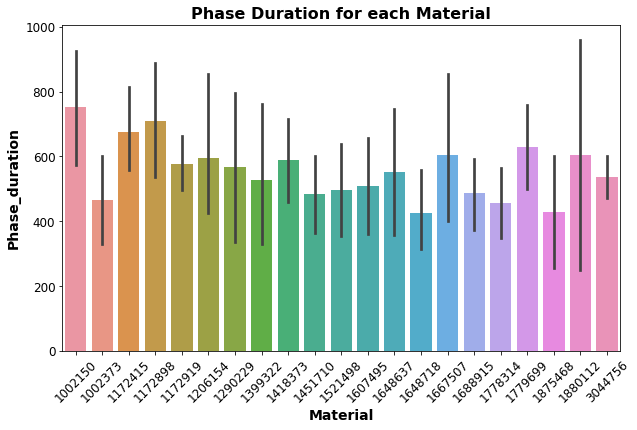

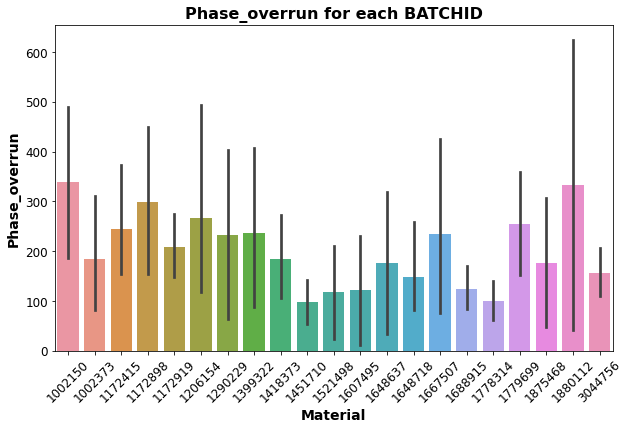

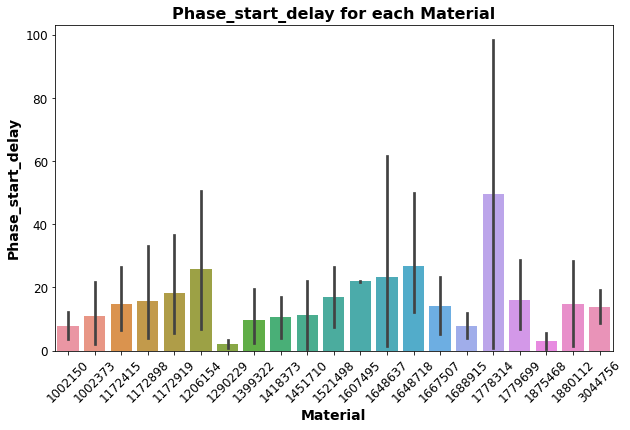

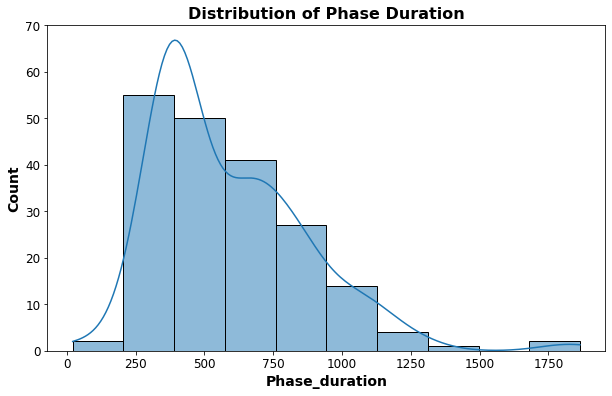

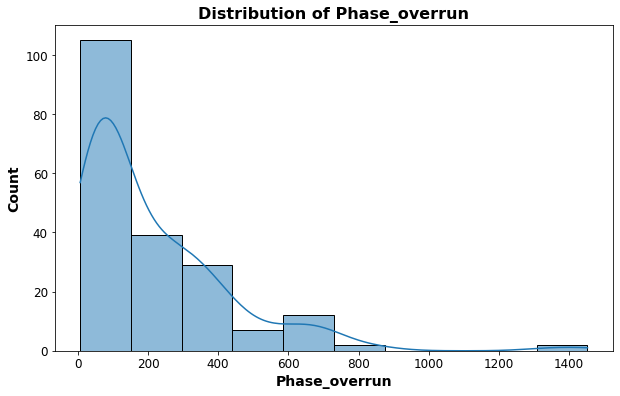

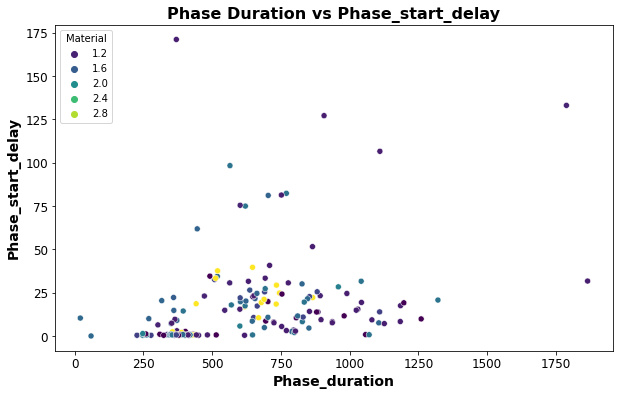

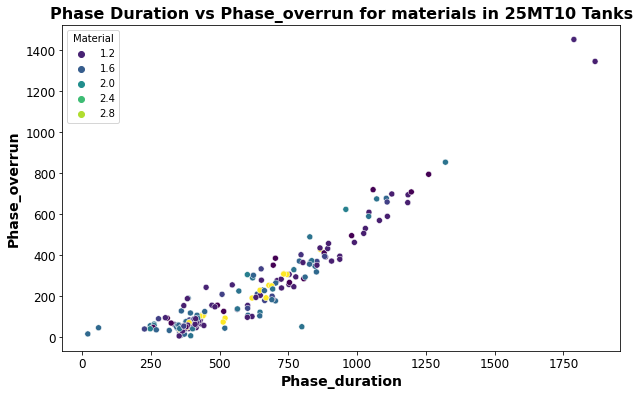

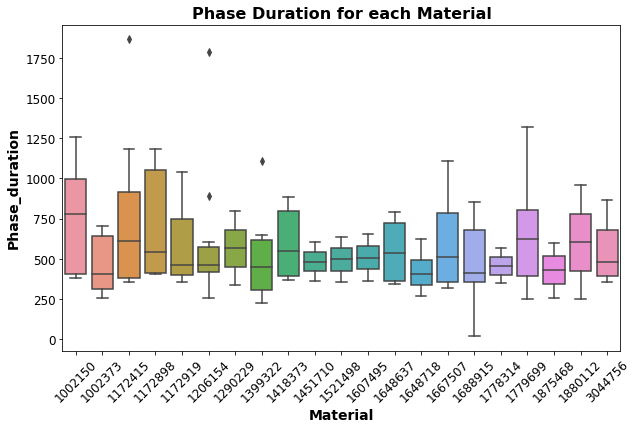

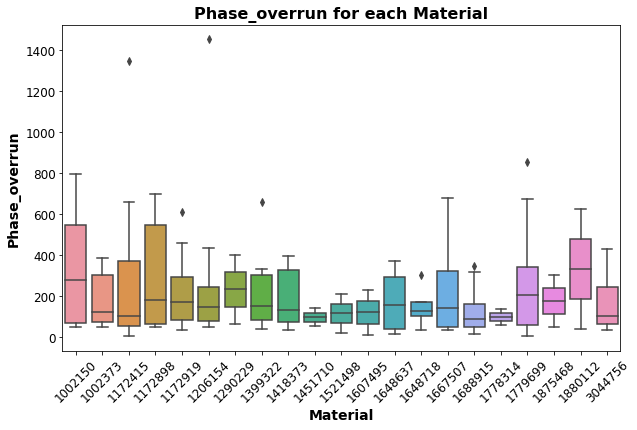

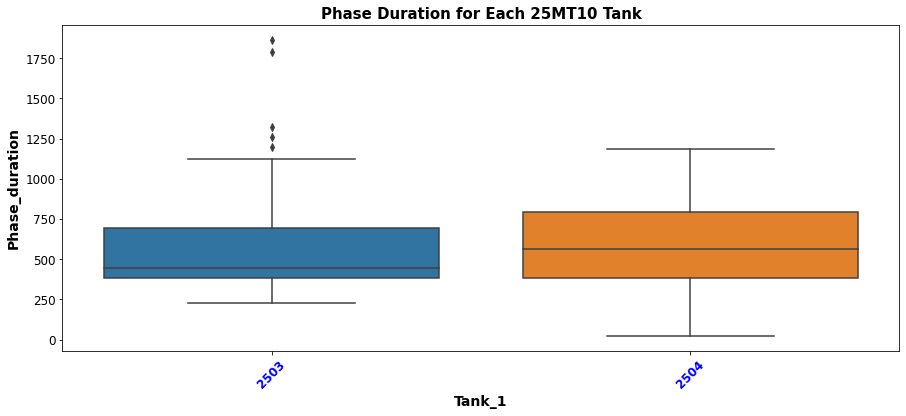

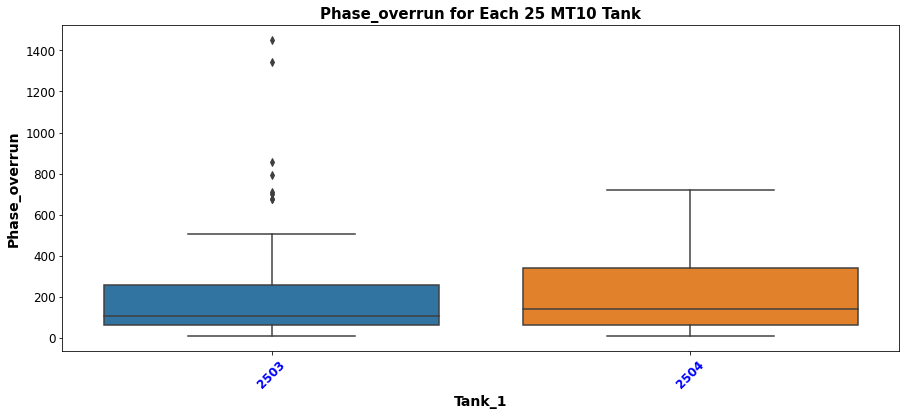

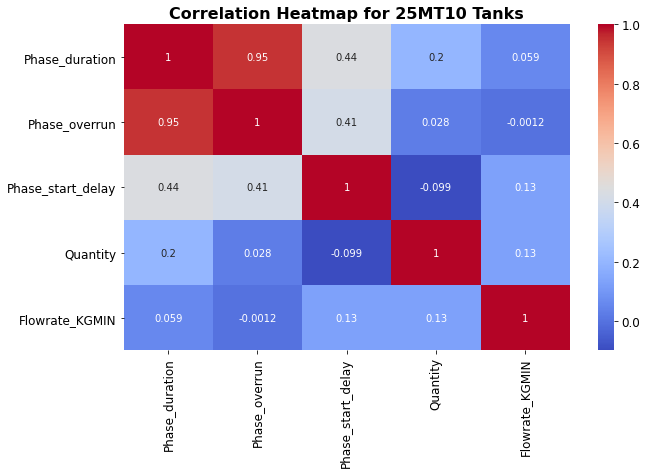

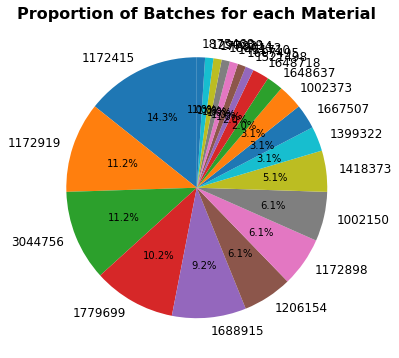

,BATCHID,Tank_1,Phase_duration,Phase_overrun,Phase_start_delay,Flowrate_KGMIN,Target_Phase_duration,Target_Flowrate,Quantity
count,1.960000e+02,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,195.000000,194.000000
mean,1.078275e+08,2503.505102,590.974490,216.775510,299.081633,14.895691,42.798948,91.814150,15949.466639
std,1.631325e+05,0.501254,282.879759,222.124129,504.708429,20.918087,24.343693,36.735586,3583.254720
min,1.075483e+08,2503.000000,21.000000,7.000000,0.000000,0.000000,1.333333,37.722750,1764.064000
25%,1.076604e+08,2503.000000,383.750000,60.000000,4.000000,10.988895,21.990385,61.945500,15805.500000
50%,1.078292e+08,2504.000000,500.500000,124.500000,63.500000,11.728714,25.812865,65.187237,17565.838000
75%,1.079674e+08,2504.000000,753.250000,307.000000,431.750000,15.912818,66.600000,114.604816,18004.052000
max,1.080913e+08,2504.000000,1865.000000,1452.000000,3051.000000,296.834468,151.000000,195.866750,19979.646000


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.DataFrame(aggregated_ProductionTank2510_df1)
df2 = pd.DataFrame(aggregated_ProductionTank2510_df2)

# 1. Bar Chart - Phase_duration for each Material
plt.figure(figsize=(10, 6))
sns.barplot(x='Material', y='Phase_duration', data=df2)
plt.title('Phase Duration for each Material')
plt.xticks(rotation=45)
plt.show()

# 1. Bar Chart - Phase_Overrun for each Material
plt.figure(figsize=(10, 6))
sns.barplot(x='Material', y='Phase_overrun', data=df2)
plt.title('Phase_overrun for each BATCHID')
plt.xticks(rotation=45)
plt.show()

# 1. Bar Chart - Phase_start_delay for each Material
plt.figure(figsize=(10, 6))
sns.barplot(x='Material', y='Phase_start_delay', data=df2)
plt.title('Phase_start_delay for each Material')
plt.xticks(rotation=45)
plt.show()

# 2. Histogram - Phase_duration
plt.figure(figsize=(10, 6))
sns.histplot(df['Phase_duration'], bins=10, kde=True)
plt.title('Distribution of Phase Duration')
plt.show()

# 2. Histogram - Phase_overrun
plt.figure(figsize=(10, 6))
sns.histplot(df['Phase_overrun'], bins=10, kde=True)
plt.title('Distribution of Phase_overrun')
plt.show()

# 3. Scatter Plot - Phase_duration vs Phase_start_delay
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Phase_duration', y='Phase_start_delay', data=df2, hue='Material', palette='viridis')
plt.title('Phase Duration vs Phase_start_delay')
plt.show()

# 3. Scatter Plot - Phase_duration vs Phase_overrun
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Phase_duration', y='Phase_overrun', data=df2, hue='Material', palette='viridis')
plt.title('Phase Duration vs Phase_overrun for materials in 25MT10 Tanks')
plt.show()

# 4. Box Plot - Phase_duration grouped by Material
plt.figure(figsize=(10, 6))
sns.boxplot(x='Material', y='Phase_duration', data=df2)
plt.title('Phase Duration for each Material')
plt.xticks(rotation=45)
plt.show()

# 4. Box Plot - Phase_overrun grouped by Material
plt.figure(figsize=(10, 6))
sns.boxplot(x='Material', y='Phase_overrun', data=df2)
plt.title('Phase_overrun for each Material')
plt.xticks(rotation=45)
plt.show()

# 4. Box Plot - Phase_Phase_duration grouped by each 22MT Tank
plt.figure(figsize=(15, 6))  # Adjust the size as needed
sns.boxplot(x='Tank_1', y='Phase_duration', data=aggregated_ProductionTank2510_df2, order=tanks)
plt.title('Phase Duration for Each 25MT10 Tank', fontsize=15, fontweight='bold')
plt.xticks(rotation=45, fontsize=12, fontweight='bold', color='blue')
plt.show()

# 4. Box Plot - Phase_overrun grouped by each 22MT Tank
plt.figure(figsize=(15, 6))  # Adjust the size as needed
sns.boxplot(x='Tank_1', y='Phase_overrun', data=aggregated_ProductionTank2510_df2, order=tanks)
plt.title('Phase_overrun for Each 25 MT10 Tank', fontsize=15, fontweight='bold')
plt.xticks(rotation=45, fontsize=12, fontweight='bold', color='blue')
plt.show()

# 5. Heatmap - Correlation heatmap
correlation_matrix = df[['Phase_duration', 'Phase_overrun', 'Phase_start_delay','Quantity','Flowrate_KGMIN']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for 25MT10 Tanks')
plt.show()

# 6. Pie Chart - Proportion of batches for each Material
material_counts = df2['Material'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(material_counts, labels=material_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Batches for each Material')
plt.show()

#7 Descriptive Statistics 

aggregated_ProductionTank2510_df1.describe()


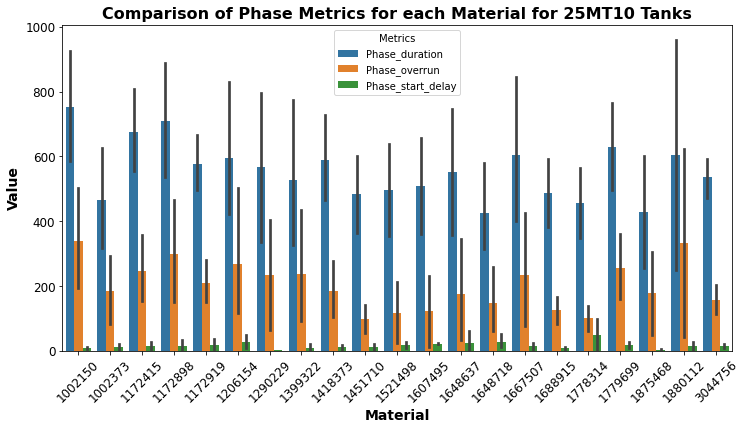

In [14]:
df = pd.DataFrame(aggregated_ProductionTank2510_df2)

# Melt the data to get it in long form
df_melted = df.melt(id_vars='Material', value_vars=['Phase_duration', 'Phase_overrun', 'Phase_start_delay'])

# Grouped bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Material', y='value', hue='variable', data=df_melted)
plt.title('Comparison of Phase Metrics for each Material for 25MT10 Tanks')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(title='Metrics')
plt.show()

In [15]:
## Examining the differences in production of materials that are common between all 25MT10 tanks

In [16]:
tanks_in_group1 = ['2503', '2504']
common_materials = aggregated_ProductionTank2510_df2.groupby('Material').filter(lambda x: x['Tank_1'].nunique() == len(tanks_in_group1))['Material'].unique()

In [17]:
filtered_data = aggregated_ProductionTank2510_df2[aggregated_ProductionTank2510_df2['Material'].isin(common_materials)]

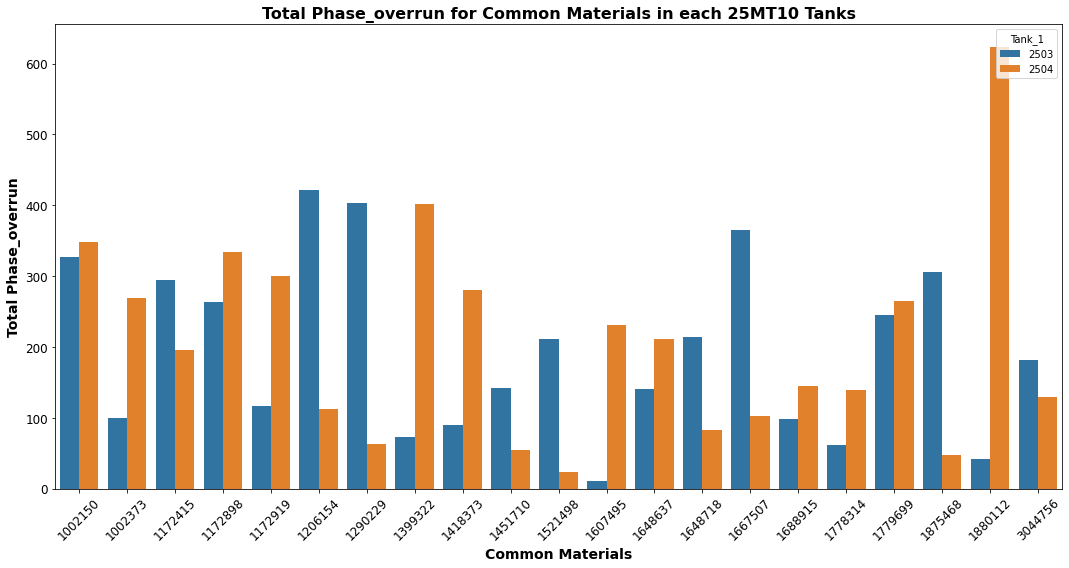

In [18]:
plt.figure(figsize=(15, 8))
sns.barplot(data=filtered_data, x='Material', y='Phase_overrun', hue='Tank_1', ci=None)

plt.title('Total Phase_overrun for Common Materials in each 25MT10 Tanks')
plt.ylabel('Total Phase_overrun')
plt.xlabel('Common Materials')
plt.legend(title='Tank_1', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

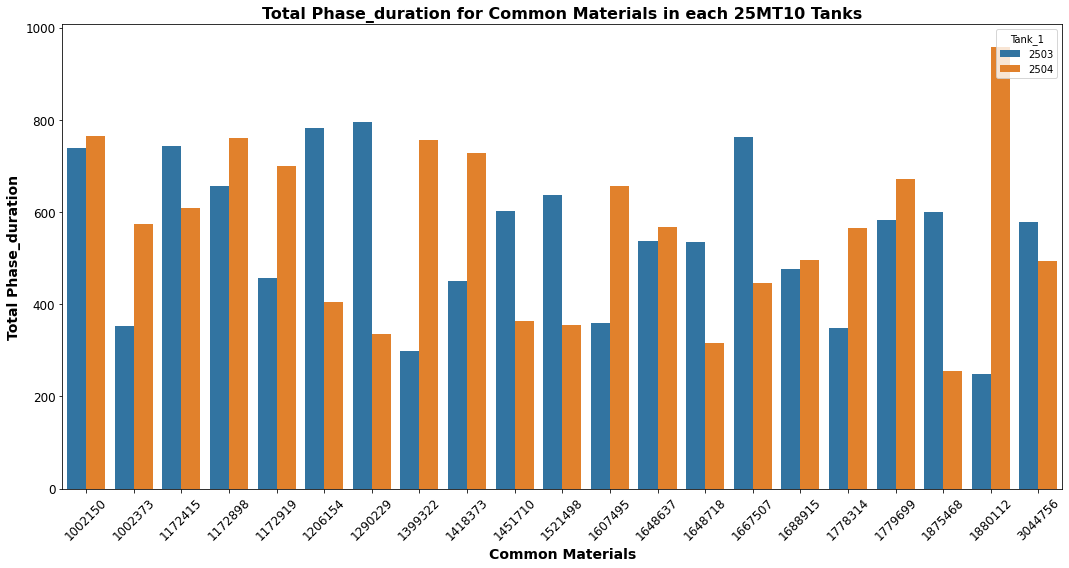

In [19]:
plt.figure(figsize=(15, 8))
sns.barplot(data=filtered_data, x='Material', y='Phase_duration', hue='Tank_1', ci=None)

plt.title('Total Phase_duration for Common Materials in each 25MT10 Tanks')
plt.ylabel('Total Phase_duration')
plt.xlabel('Common Materials')
plt.legend(title='Tank_1', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

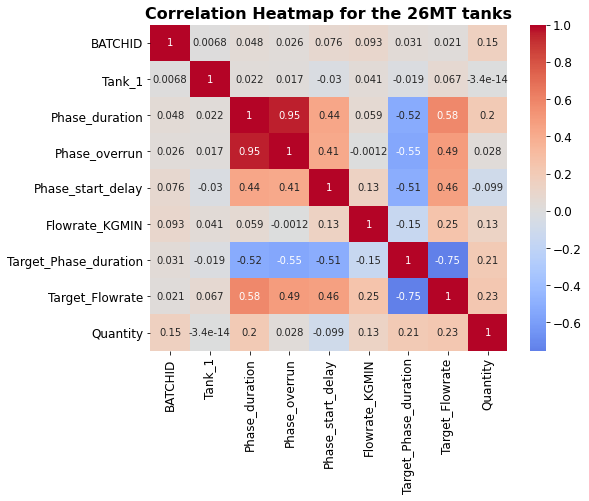

In [20]:
correlation_matrix = aggregated_ProductionTank2510_df1.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap for the 26MT tanks")
plt.show()

In [21]:
# Handling missing values
aggregated_ProductionTank2510_df1.dropna(inplace=True)  # Remove rows with missing values

In [22]:
# Handling duplicates
aggregated_ProductionTank2510_df1.drop_duplicates(inplace=True)  # Remove duplicate rows

In [23]:
# Define columns where you want to detect and remove outliers
ProductionTank2510_df2 = pd.DataFrame(aggregated_ProductionTank2510_df1)
columns_to_check = ['Phase_duration', 'Phase_overrun', 'Phase_start_delay', 'Flowrate_KGMIN', 'Target_Phase_duration', 'Target_Flowrate']

# Define a function to remove outliers using IQR
def remove_outliers_iqr(data, column, iqr_multiplier=1.5):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - iqr_multiplier * IQR
    upper_bound = Q3 + iqr_multiplier * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Remove outliers for each column
for col in columns_to_check:
    ProductionTank2510_df2 = remove_outliers_iqr(ProductionTank2510_df2, col)

# Display the cleaned DataFrame
print(ProductionTank2510_df2)

       BATCHID  Tank_1  Phase_duration  Phase_overrun  Phase_start_delay  \
0    107548288    2503             546          256.0                297   
1    107548288    2504             254           50.0                  3   
5    107582580    2504             373           49.0                  4   
6    107588998    2503             866          429.0                466   
7    107588998    2504             384           60.0                  2   
..         ...     ...             ...            ...                ...   
189  108075715    2504             451          244.0                  2   
190  108083245    2503             370           56.0                  5   
191  108083245    2504             725          241.0                175   
192  108083247    2503             370           55.0                  3   
194  108091251    2503             443           58.0                  3   

     Flowrate_KGMIN  Target_Phase_duration  Target_Flowrate   Quantity  
0          8.8

In [24]:
# Define columns where you want to detect and remove outliers
ProductionTank2510_df1 = pd.DataFrame(aggregated_ProductionTank2510_df1)
columns_to_check = ['Phase_duration', 'Phase_overrun', 'Phase_start_delay', 'Flowrate_KGMIN', 'Target_Phase_duration', 'Target_Flowrate']

# Define a function to remove outliers using IQR
def remove_outliers_iqr(data, column, iqr_multiplier=1.5):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - iqr_multiplier * IQR
    upper_bound = Q3 + iqr_multiplier * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Remove outliers for each column
for col in columns_to_check:
    ProductionTank2510_df1 = remove_outliers_iqr(ProductionTank2510_df1, col)

# Display the cleaned DataFrame
print(ProductionTank2510_df1)

       BATCHID  Tank_1  Phase_duration  Phase_overrun  Phase_start_delay  \
0    107548288    2503             546          256.0                297   
1    107548288    2504             254           50.0                  3   
5    107582580    2504             373           49.0                  4   
6    107588998    2503             866          429.0                466   
7    107588998    2504             384           60.0                  2   
..         ...     ...             ...            ...                ...   
189  108075715    2504             451          244.0                  2   
190  108083245    2503             370           56.0                  5   
191  108083245    2504             725          241.0                175   
192  108083247    2503             370           55.0                  3   
194  108091251    2503             443           58.0                  3   

     Flowrate_KGMIN  Target_Phase_duration  Target_Flowrate   Quantity  
0          8.8

In [25]:
# For the original DataFrame
print("Original DataFrame Summary Statistics:")
print(aggregated_ProductionTank2510_df1.describe())

# After removing outliers
print("\nCleaned DataFrame Summary Statistics:")
print(ProductionTank2510_df2.describe())

Original DataFrame Summary Statistics:
            BATCHID       Tank_1  Phase_duration  Phase_overrun  \
count  1.940000e+02   194.000000      194.000000     194.000000   
mean   1.078264e+08  2503.500000      596.649485     218.680412   
std    1.631731e+05     0.501294      278.700111     222.464903   
min    1.075483e+08  2503.000000      227.000000       7.000000   
25%    1.076604e+08  2503.000000      384.000000      61.500000   
50%    1.078292e+08  2503.500000      511.000000     126.500000   
75%    1.079634e+08  2504.000000      753.750000     307.000000   
max    1.080913e+08  2504.000000     1865.000000    1452.000000   

       Phase_start_delay  Flowrate_KGMIN  Target_Phase_duration  \
count         194.000000      194.000000             194.000000   
mean          302.005155       14.948857              43.216549   
std           506.483820       20.996178              24.115724   
min             2.000000        1.225040              13.730769   
25%             4.0000

In [26]:
# Scaling numerical variables (if needed)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = ['Phase_duration', 'Phase_overrun', 'Phase_start_delay', 'Flowrate_KGMIN']
ProductionTank2510_df2[numerical_cols] = scaler.fit_transform(ProductionTank2510_df2[numerical_cols])
print(ProductionTank2510_df2.head())

     BATCHID  Tank_1  Phase_duration  Phase_overrun  Phase_start_delay  \
0  107548288    2503        0.044394       0.513147           0.731100   
1  107548288    2504       -1.239918      -0.769513          -0.692869   
5  107582580    2504       -0.716517      -0.775739          -0.688026   
6  107588998    2503        1.451858       1.590332           1.549640   
7  107588998    2504       -0.668135      -0.707248          -0.697713   

   Flowrate_KGMIN  Target_Phase_duration  Target_Flowrate   Quantity  
0       -1.244485              16.300000       112.948186  10015.658  
1       -0.673220              42.800000        61.945500  10015.658  
5       -0.169335              66.600000        61.945500  18135.674  
6        0.738694              21.666667       145.912750  17991.470  
7       -0.176327              66.600000        61.945500  17991.470  


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor
from tabulate import tabulate

# Load your dataset (replace 'ProductionTank22_df2' with your actual dataset)
df = pd.DataFrame(ProductionTank2510_df2)

# Define features and target
# Define features and target
X = df.drop(['Phase_overrun','Target_Flowrate','Target_Phase_duration'], axis=1)
y = df['Phase_overrun']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Train MSE', 'Test MSE', 'Train R2', 'Test R2'])

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred_train = lr_model.predict(X_train)
lr_pred_test = lr_model.predict(X_test)
lr_train_mse = mean_squared_error(y_train, lr_pred_train)
lr_test_mse = mean_squared_error(y_test, lr_pred_test)
lr_train_r2 = r2_score(y_train, lr_pred_train)
lr_test_r2 = r2_score(y_test, lr_pred_test)
results_df = results_df.append({'Model': 'Linear Regression', 'Train MSE': lr_train_mse, 'Test MSE': lr_test_mse, 'Train R2': lr_train_r2, 'Test R2': lr_test_r2}, ignore_index=True)

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_pred_train = ridge_model.predict(X_train)
ridge_pred_test = ridge_model.predict(X_test)
ridge_train_mse = mean_squared_error(y_train, ridge_pred_train)
ridge_test_mse = mean_squared_error(y_test, ridge_pred_test)
ridge_train_r2 = r2_score(y_train, ridge_pred_train)
ridge_test_r2 = r2_score(y_test, ridge_pred_test)
results_df = results_df.append({'Model': 'Ridge Regression', 'Train MSE': ridge_train_mse, 'Test MSE': ridge_test_mse, 'Train R2': ridge_train_r2, 'Test R2': ridge_test_r2}, ignore_index=True)

# Lasso Regression
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)
lasso_pred_train = lasso_model.predict(X_train)
lasso_pred_test = lasso_model.predict(X_test)
lasso_train_mse = mean_squared_error(y_train, lasso_pred_train)
lasso_test_mse = mean_squared_error(y_test, lasso_pred_test)
lasso_train_r2 = r2_score(y_train, lasso_pred_train)
lasso_test_r2 = r2_score(y_test, lasso_pred_test)
results_df = results_df.append({'Model': 'Lasso Regression', 'Train MSE': lasso_train_mse, 'Test MSE': lasso_test_mse, 'Train R2': lasso_train_r2, 'Test R2': lasso_test_r2}, ignore_index=True)

# RandomForest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred_train = rf_model.predict(X_train)
rf_pred_test = rf_model.predict(X_test)
rf_train_mse = mean_squared_error(y_train, rf_pred_train)
rf_test_mse = mean_squared_error(y_test, rf_pred_test)
rf_train_r2 = r2_score(y_train, rf_pred_train)
rf_test_r2 = r2_score(y_test, rf_pred_test)
results_df = results_df.append({'Model': 'Random Forest Regressor', 'Train MSE': rf_train_mse, 'Test MSE': rf_test_mse, 'Train R2': rf_train_r2, 'Test R2': rf_test_r2}, ignore_index=True)
rf_feature_importance = rf_model.feature_importances_

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred_train = gb_model.predict(X_train)
gb_pred_test = gb_model.predict(X_test)
gb_train_mse = mean_squared_error(y_train, gb_pred_train)
gb_test_mse = mean_squared_error(y_test, gb_pred_test)
gb_train_r2 = r2_score(y_train, gb_pred_train)
gb_test_r2 = r2_score(y_test, gb_pred_test)
results_df = results_df.append({'Model': 'Gradient Boosting Regressor', 'Train MSE': gb_train_mse, 'Test MSE': gb_test_mse, 'Train R2': gb_train_r2, 'Test R2': gb_test_r2}, ignore_index=True)
gb_feature_importance = gb_model.feature_importances_

# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred_train = dt_model.predict(X_train)
dt_pred_test = dt_model.predict(X_test)
dt_train_mse = mean_squared_error(y_train, dt_pred_train)
dt_test_mse = mean_squared_error(y_test, dt_pred_test)
dt_train_r2 = r2_score(y_train, dt_pred_train)
dt_test_r2 = r2_score(y_test, dt_pred_test)
results_df = results_df.append({'Model': 'Decision Tree Regressor', 'Train MSE': dt_train_mse, 'Test MSE': dt_test_mse, 'Train R2': dt_train_r2, 'Test R2': dt_test_r2}, ignore_index=True)

# Bagging Regressor (based on Decision Trees by default)
bag_model = BaggingRegressor(n_estimators=100, random_state=42)
bag_model.fit(X_train, y_train)
bag_pred_train = bag_model.predict(X_train)
bag_pred_test = bag_model.predict(X_test)
bag_train_mse = mean_squared_error(y_train, bag_pred_train)
bag_test_mse = mean_squared_error(y_test, bag_pred_test)
bag_train_r2 = r2_score(y_train, bag_pred_train)
bag_test_r2 = r2_score(y_test, bag_pred_test)
results_df = results_df.append({'Model': 'Bagging Regressor', 'Train MSE': bag_train_mse, 'Test MSE': bag_test_mse, 'Train R2': bag_train_r2, 'Test R2': bag_test_r2}, ignore_index=True)

# AdaBoost Regressor
ada_model = AdaBoostRegressor(n_estimators=100, random_state=42)
ada_model.fit(X_train, y_train)
ada_pred_train = ada_model.predict(X_train)
ada_pred_test = ada_model.predict(X_test)
ada_train_mse = mean_squared_error(y_train, ada_pred_train)
ada_test_mse = mean_squared_error(y_test, ada_pred_test)
ada_train_r2 = r2_score(y_train, ada_pred_train)
ada_test_r2 = r2_score(y_test, ada_pred_test)
results_df = results_df.append({'Model': 'AdaBoost Regressor', 'Train MSE': ada_train_mse, 'Test MSE': ada_test_mse, 'Train R2': ada_train_r2, 'Test R2': ada_test_r2}, ignore_index=True)



# Print the results DataFrame
#print(results_df)
# Print the results DataFrame in tabulated form
print(tabulate(results_df, headers='keys', tablefmt='grid'))
# Save results DataFrame to an Excel file
results_df.to_excel('2510results.xlsx', index=False)


+----+-----------------------------+-------------+------------+------------+-----------+
|    | Model                       |   Train MSE |   Test MSE |   Train R2 |   Test R2 |
+====+=============================+=============+============+============+===========+
|  0 | Linear Regression           |  0.0453472  |  0.0918241 |  0.954981  |  0.900198 |
+----+-----------------------------+-------------+------------+------------+-----------+
|  1 | Ridge Regression            |  0.045541   |  0.0905066 |  0.954788  |  0.90163  |
+----+-----------------------------+-------------+------------+------------+-----------+
|  2 | Lasso Regression            |  0.993306   |  1.07608   |  0.0138758 | -0.16958  |
+----+-----------------------------+-------------+------------+------------+-----------+
|  3 | Random Forest Regressor     |  0.0119433  |  0.12389   |  0.988143  |  0.865346 |
+----+-----------------------------+-------------+------------+------------+-----------+
|  4 | Gradient Boost

In [28]:
# Create a list of models with their respective hyperparameters
# Initialize models
models = [
    LinearRegression(),
    Ridge(alpha=1.0),
    Lasso(alpha=1.0),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    SVR(),
    MLPRegressor(),
    DecisionTreeRegressor(random_state=42),
    AdaBoostRegressor(n_estimators=100, random_state=42),
    BaggingRegressor(n_estimators=100, random_state=42)
]

# Perform cross-validation for each model
for model in models:
    model_name = model.__class__.__name__
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    mse_scores = -scores  # Convert negative MSE back to positive
    mean_mse = mse_scores.mean()
    std_mse = mse_scores.std()
    print(f"{model_name}:\n  Mean MSE: {mean_mse:.6f}\n  Std MSE: {std_mse:.6f}\n")
    
    # Save the results to an Excel file
df.to_excel("2510model_results.xlsx", index=False)
#a file named model_results.xlsx in the current working directory containing the mean and standard deviation of the MSE for each model. You can then open this file with Excel to view the results.

   

LinearRegression:
  Mean MSE: 0.066463
  Std MSE: 0.039714

Ridge:
  Mean MSE: 0.065177
  Std MSE: 0.036613

Lasso:
  Mean MSE: 1.035057
  Std MSE: 0.219035

RandomForestRegressor:
  Mean MSE: 0.079202
  Std MSE: 0.031359

GradientBoostingRegressor:
  Mean MSE: 0.078332
  Std MSE: 0.028655

SVR:
  Mean MSE: 1.268065
  Std MSE: 0.354450

MLPRegressor:
  Mean MSE: 2943917550211.498047
  Std MSE: 3546620317392.266602

DecisionTreeRegressor:
  Mean MSE: 0.160339
  Std MSE: 0.063526

AdaBoostRegressor:
  Mean MSE: 0.097551
  Std MSE: 0.031367

BaggingRegressor:
  Mean MSE: 0.076575
  Std MSE: 0.035672



In [29]:
from sklearn.model_selection import train_test_split, GridSearchCV
# Load your dataset (replace 'ProductionTank2202_df2' with your actual dataset)
df = pd.DataFrame(ProductionTank2510_df2)

# Define features and target
# Define features and target
X = df.drop(['Phase_overrun','Target_Flowrate','Target_Phase_duration'], axis=1)
y = df['Phase_overrun']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Train MSE', 'Test MSE', 'Train R2', 'Test R2'])

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred_train = lr_model.predict(X_train)
lr_pred_test = lr_model.predict(X_test)
lr_train_mse = mean_squared_error(y_train, lr_pred_train)
lr_test_mse = mean_squared_error(y_test, lr_pred_test)
lr_train_r2 = r2_score(y_train, lr_pred_train)
lr_test_r2 = r2_score(y_test, lr_pred_test)
results_df = results_df.append({'Model': 'Linear Regression', 'Train MSE': lr_train_mse, 'Test MSE': lr_test_mse, 'Train R2': lr_train_r2, 'Test R2': lr_test_r2}, ignore_index=True)

# Ridge Regression with Hyperparameter Tuning
ridge_params = {'alpha': [0.01, 0.1, 1.0, 10.0]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5)
ridge_grid.fit(X_train, y_train)
best_ridge = ridge_grid.best_estimator_
ridge_pred_train = best_ridge.predict(X_train)
ridge_pred_test = best_ridge.predict(X_test)
ridge_train_mse = mean_squared_error(y_train, ridge_pred_train)
ridge_test_mse = mean_squared_error(y_test, ridge_pred_test)
ridge_train_r2 = r2_score(y_train, ridge_pred_train)
ridge_test_r2 = r2_score(y_test, ridge_pred_test)
results_df = results_df.append({'Model': 'Ridge Regression', 'Train MSE': ridge_train_mse, 'Test MSE': ridge_test_mse, 'Train R2': ridge_train_r2, 'Test R2': ridge_test_r2}, ignore_index=True)
print(f"Best parameters for Ridge Regression: {ridge_grid.best_params_}")

# Lasso Regression with Hyperparameter Tuning
lasso_params = {'alpha': [0.01, 0.1, 1.0, 10.0]}
lasso_grid = GridSearchCV(Lasso(), lasso_params, cv=5)
lasso_grid.fit(X_train, y_train)
best_lasso = lasso_grid.best_estimator_
lasso_pred_train = best_lasso.predict(X_train)
lasso_pred_test = best_lasso.predict(X_test)
lasso_train_mse = mean_squared_error(y_train, lasso_pred_train)
lasso_test_mse = mean_squared_error(y_test, lasso_pred_test)
lasso_train_r2 = r2_score(y_train, lasso_pred_train)
lasso_test_r2 = r2_score(y_test, lasso_pred_test)
results_df = results_df.append({'Model': 'Lasso Regression', 'Train MSE': lasso_train_mse, 'Test MSE': lasso_test_mse, 'Train R2': lasso_train_r2, 'Test R2': lasso_test_r2}, ignore_index=True)
print(f"Best parameters for Lasso Regression: {lasso_grid.best_params_}")

# Random Forest Regressor with Hyperparameter Tuning
rf_params = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20]}
rf_grid = GridSearchCV(RandomForestRegressor(), rf_params, cv=5)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_
rf_pred_train = best_rf.predict(X_train)
rf_pred_test = best_rf.predict(X_test)
rf_train_mse = mean_squared_error(y_train, rf_pred_train)
rf_test_mse = mean_squared_error(y_test, rf_pred_test)
rf_train_r2 = r2_score(y_train, rf_pred_train)
rf_test_r2 = r2_score(y_test, rf_pred_test)
rf_feature_importance = rf_model.feature_importances_
results_df = results_df.append({'Model': 'Random Forest Regressor', 'Train MSE': rf_train_mse, 'Test MSE': rf_test_mse, 'Train R2': rf_train_r2, 'Test R2': rf_test_r2}, ignore_index=True)
print(f"Best parameters for Random Forest Regressor: {rf_grid.best_params_}")

# Gradient Boosting Regressor with Hyperparameter Tuning
gb_params = {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 4, 5]}
gb_grid = GridSearchCV(GradientBoostingRegressor(), gb_params, cv=5)
gb_grid.fit(X_train, y_train)
best_gb = gb_grid.best_estimator_
gb_pred_train = best_gb.predict(X_train)
gb_pred_test = best_gb.predict(X_test)
gb_train_mse = mean_squared_error(y_train, gb_pred_train)
gb_test_mse = mean_squared_error(y_test, gb_pred_test)
gb_train_r2 = r2_score(y_train, gb_pred_train)
gb_test_r2 = r2_score(y_test, gb_pred_test)
gb_feature_importance = rf_model.feature_importances_
results_df = results_df.append({'Model': 'Gradient Boosting Regressor', 'Train MSE': gb_train_mse, 'Test MSE': gb_test_mse, 'Train R2': gb_train_r2, 'Test R2': gb_test_r2}, ignore_index=True)
print(f"Best parameters for Gradient Boosting Regressor: {gb_grid.best_params_}")

# Decision Tree Regressor with Hyperparameter Tuning
dt_params = {'max_depth': [None, 10, 20]}
dt_grid = GridSearchCV(DecisionTreeRegressor(), dt_params, cv=5)
dt_grid.fit(X_train, y_train)
best_dt = dt_grid.best_estimator_
dt_pred_train = best_dt.predict(X_train)
dt_pred_test = best_dt.predict(X_test)
dt_train_mse = mean_squared_error(y_train, dt_pred_train)
dt_test_mse = mean_squared_error(y_test, dt_pred_test)
dt_train_r2 = r2_score(y_train, dt_pred_train)
dt_test_r2 = r2_score(y_test, dt_pred_test)
results_df = results_df.append({'Model': 'Decision Tree Regressor', 'Train MSE': dt_train_mse, 'Test MSE': dt_test_mse, 'Train R2': dt_train_r2, 'Test R2': dt_test_r2}, ignore_index=True)
print(f"Best parameters for Decision Tree Regressor: {dt_grid.best_params_}")

# Bagging Regressor with Hyperparameter Tuning
bag_params = {
    'n_estimators': [50, 100, 200],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0]
}

bag_grid = GridSearchCV(BaggingRegressor(random_state=42), bag_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
bag_grid.fit(X_train, y_train)
bag_best = bag_grid.best_estimator_

# Using the best estimator from GridSearch to make predictions
bag_pred_train = bag_best.predict(X_train)
bag_pred_test = bag_best.predict(X_test)
bag_train_mse = mean_squared_error(y_train, bag_pred_train)
bag_test_mse = mean_squared_error(y_test, bag_pred_test)
bag_train_r2 = r2_score(y_train, bag_pred_train)
bag_test_r2 = r2_score(y_test, bag_pred_test)
results_df = results_df.append({'Model': 'Bagging Regressor', 'Train MSE': bag_train_mse, 'Test MSE': bag_test_mse, 'Train R2': bag_train_r2, 'Test R2': bag_test_r2}, ignore_index=True)
print(f"Best parameters for Bagging Regressor: {bag_grid.best_params_}")

# AdaBoost Regressor with Hyperparameter Tuning
ada_model = AdaBoostRegressor(n_estimators=100, random_state=42)
ada_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1]
}
ada_grid = GridSearchCV(AdaBoostRegressor(random_state=42), ada_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
ada_model.fit(X_train, y_train)
#ada_best = ada_grid.best_estimator_

# Use the best estimator to make predictions
#ada_pred_train = best_ada.predict(X_train)
#ada_pred_test = best_ada.predict(X_test)

ada_train_mse = mean_squared_error(y_train, ada_pred_train)
ada_test_mse = mean_squared_error(y_test, ada_pred_test)
ada_train_r2 = r2_score(y_train, ada_pred_train)
ada_test_r2 = r2_score(y_test, ada_pred_test)
results_df = results_df.append({'Model': 'AdaBoost Regressor', 'Train MSE': ada_train_mse, 'Test MSE': ada_test_mse, 'Train R2': ada_train_r2, 'Test R2': ada_test_r2}, ignore_index=True)

# Print the results DataFrame
print(results_df)
# Print the results DataFrame in tabulated form
print(tabulate(results_df, headers='keys', tablefmt='grid'))
# Save results DataFrame to an Excel file
results_df.to_excel('2510 TUN results.xlsx', index=False)

Best parameters for Ridge Regression: {'alpha': 0.01}
Best parameters for Lasso Regression: {'alpha': 0.01}
Best parameters for Random Forest Regressor: {'max_depth': 10, 'n_estimators': 200}
Best parameters for Gradient Boosting Regressor: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300}
Best parameters for Decision Tree Regressor: {'max_depth': None}
Best parameters for Bagging Regressor: {'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 200}
                         Model     Train MSE  Test MSE  Train R2   Test R2
0            Linear Regression  4.534724e-02  0.091824  0.954981  0.900198
1             Ridge Regression  4.534726e-02  0.091809  0.954981  0.900214
2             Lasso Regression  4.638657e-02  0.087693  0.953949  0.904688
3      Random Forest Regressor  1.164851e-02  0.109789  0.988436  0.880672
4  Gradient Boosting Regressor  3.397041e-07  0.115331  1.000000  0.874648
5      Decision Tree Regressor  0.000000e+00  0.157601  1.000000  0.828705
6      

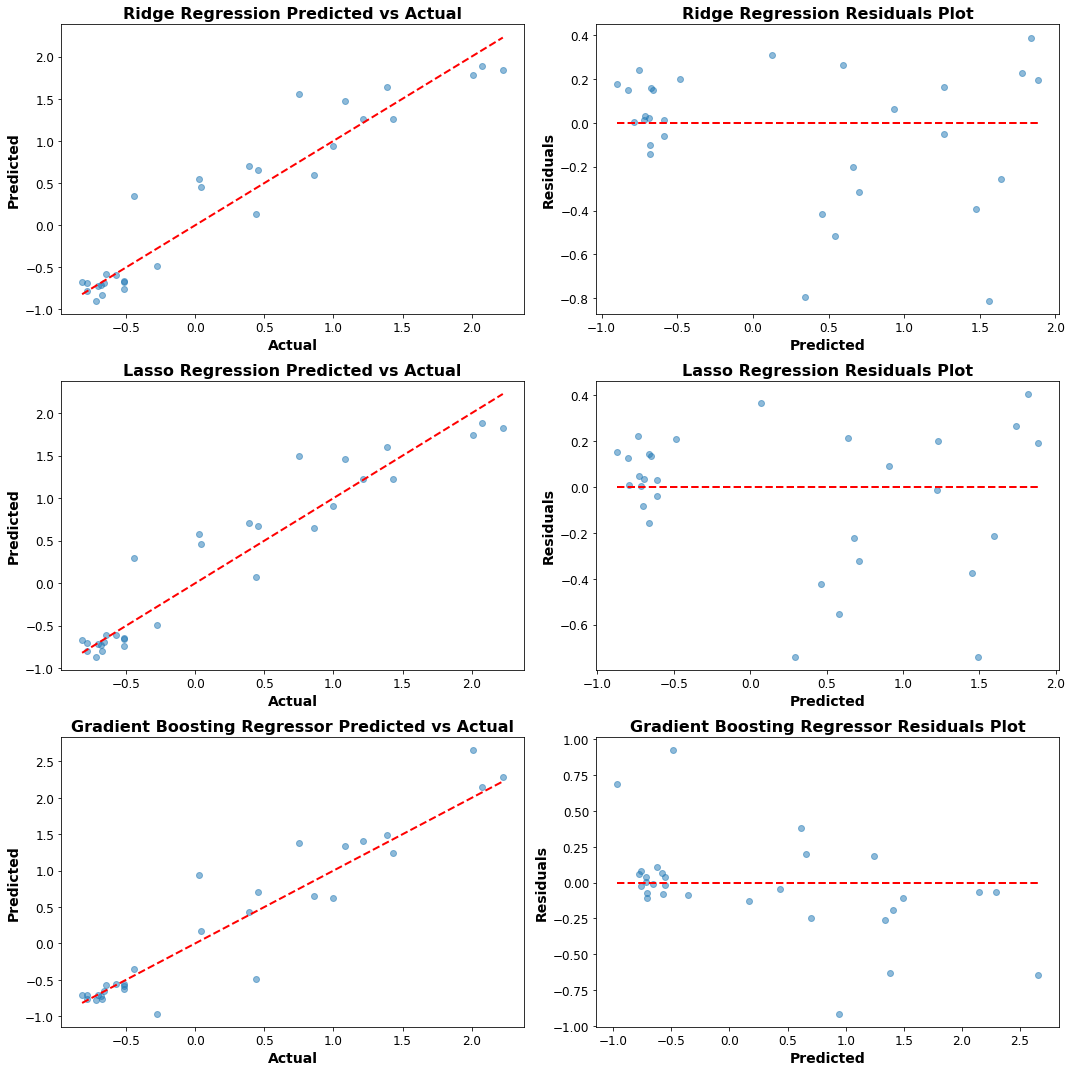

In [30]:
# Visualization function
def plot_predictions(models, actual, predictions, model_names):
    fig, ax = plt.subplots(len(models), 2, figsize=(15, 5*len(models)))
    
    for i, (model, pred, name) in enumerate(zip(models, predictions, model_names)):
        # Scatter plot of predicted vs actual
        ax[i][0].scatter(actual, pred, alpha=0.5)
        ax[i][0].plot([min(actual), max(actual)], [min(actual), max(actual)], '--', lw=2, color='red')
        ax[i][0].set_title(f'{name} Predicted vs Actual')
        ax[i][0].set_xlabel('Actual')
        ax[i][0].set_ylabel('Predicted')

        # Residuals plot
        residuals = actual - pred
        ax[i][1].scatter(pred, residuals, alpha=0.5)
        ax[i][1].hlines(0, min(pred), max(pred), colors='red', linestyles='--', lw=2)
        ax[i][1].set_title(f'{name} Residuals Plot')
        ax[i][1].set_xlabel('Predicted')
        ax[i][1].set_ylabel('Residuals')

    plt.tight_layout()
    plt.show()

# Collecting models and their predictions
models_list = [best_lasso, best_ridge, best_gb]
predictions_list = [ridge_pred_test, lasso_pred_test, gb_pred_test]
model_names = ['Ridge Regression', 'Lasso Regression', 'Gradient Boosting Regressor']

# Plotting
plot_predictions(models_list, y_test, predictions_list, model_names)

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor
from tabulate import tabulate

# Load your dataset (replace 'ProductionTank22_df2' with your actual dataset)
df = pd.DataFrame(ProductionTank2510_df1)

# Define features and target
X = df.drop(['Phase_overrun', 'Target_Flowrate', 'Target_Phase_duration'], axis=1)
y = df['Phase_overrun']

# Initialize k-fold cross-validator
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Train MSE', 'Test MSE', 'Train R2', 'Test R2'])

# Define the models to be evaluated
models = [
    LinearRegression(),
    Ridge(alpha=1.0),
    Lasso(alpha=1.0),
    RandomForestRegressor(n_estimators=100, random_state=42),
    GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    SVR(),
    MLPRegressor(),
    DecisionTreeRegressor(random_state=42),
    BaggingRegressor(n_estimators=100, random_state=42),
    AdaBoostRegressor(n_estimators=100, random_state=42)
]

# Iterate through each model and perform k-fold cross-validation
for model in models:
    model_name = model.__class__.__name__
    train_mse_list = []
    test_mse_list = []
    train_r2_list = []
    test_r2_list = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        model.fit(X_train, y_train)
        
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        train_mse = mean_squared_error(y_train, y_train_pred)
        test_mse = mean_squared_error(y_test, y_test_pred)
        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)
        
        train_mse_list.append(train_mse)
        test_mse_list.append(test_mse)
        train_r2_list.append(train_r2)
        test_r2_list.append(test_r2)
    
    mean_train_mse = sum(train_mse_list) / num_folds
    mean_test_mse = sum(test_mse_list) / num_folds
    mean_train_r2 = sum(train_r2_list) / num_folds
    mean_test_r2 = sum(test_r2_list) / num_folds
    
    results_df = results_df.append({'Model': model_name, 'Train MSE': mean_train_mse, 'Test MSE': mean_test_mse,
                                    'Train R2': mean_train_r2, 'Test R2': mean_test_r2}, ignore_index=True)

# Print the results DataFrame
print(tabulate(results_df, headers='keys', tablefmt='grid'))

# Save results DataFrame to an Excel file
results_df.to_excel('25MT10kfold_results.xlsx', index=False)

+----+---------------------------+-----------------+-----------------+--------------+--------------+
|    | Model                     |       Train MSE |        Test MSE |     Train R2 |      Test R2 |
+====+===========================+=================+=================+==============+==============+
|  0 | LinearRegression          |  1365.28        |  1552.71        |  0.947272    |  0.942005    |
+----+---------------------------+-----------------+-----------------+--------------+--------------+
|  1 | Ridge                     |  1365.3         |  1551.42        |  0.947271    |  0.942055    |
+----+---------------------------+-----------------+-----------------+--------------+--------------+
|  2 | Lasso                     |  1368.86        |  1549.28        |  0.947136    |  0.942077    |
+----+---------------------------+-----------------+-----------------+--------------+--------------+
|  3 | RandomForestRegressor     |   314.619       |  2117.37        |  0.987801    |  0.91

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from tabulate import tabulate
from sklearn.model_selection import GridSearchCV

# Assuming you've loaded 'ProductionTank22_df2' somewhere in your code
df = pd.DataFrame(ProductionTank2510_df1)

# Define features and target
X = df.drop(['Phase_overrun', 'Target_Flowrate', 'Target_Phase_duration'], axis=1)
y = df['Phase_overrun']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

results_df = pd.DataFrame(columns=['Model', 'Train MSE', 'Test MSE', 'Train R2', 'Test R2', 'CV MSE Mean', 'CV MSE Std'])

# Function to perform model training, prediction and storing results
def evaluate_model(model, name):
    model.fit(X_train_scaled, y_train)
    
    pred_train = model.predict(X_train_scaled)
    pred_test = model.predict(X_test_scaled)
    
    train_mse = mean_squared_error(y_train, pred_train)
    test_mse = mean_squared_error(y_test, pred_test)
    
    train_r2 = r2_score(y_train, pred_train)
    test_r2 = r2_score(y_test, pred_test)
    
    # Perform cross-validation
    cv_scores = -cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()

    results_df.loc[name] = [name, train_mse, test_mse, train_r2, test_r2, cv_mean, cv_std]

# K-Nearest Neighbors
knn_model = KNeighborsRegressor(n_neighbors=5)
evaluate_model(knn_model, 'K-Nearest Neighbors')

# Support Vector Machine
svm_model = SVR(kernel='rbf')
evaluate_model(svm_model, 'Support Vector Machine')

print(tabulate(results_df, headers='keys', tablefmt='grid'))

results_df.to_excel('knn_svm_results.xlsx', index=False)

def hypertune_model(model, params, name):
    grid_search = GridSearchCV(model, params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
    grid_search.fit(X_train_scaled, y_train)

    best_model = grid_search.best_estimator_

    evaluate_model(best_model, name)
    print(f"Best parameters for {name}: {grid_search.best_params_}")

# K-Nearest Neighbors
knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
hypertune_model(KNeighborsRegressor(), knn_params, 'K-Nearest Neighbors')

# Support Vector Machine
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'linear', 'poly'],
    'degree': [2, 3],
    'gamma': ['scale', 'auto']
}
hypertune_model(SVR(), svm_params, 'Support Vector Machine')

print(tabulate(results_df, headers='keys', tablefmt='grid'))

results_df.to_excel('2510MTknn_svm_results_hyper_tuned.xlsx', index=False)

+------------------------+------------------------+-------------+------------+------------+-----------+---------------+--------------+
|                        | Model                  |   Train MSE |   Test MSE |   Train R2 |   Test R2 |   CV MSE Mean |   CV MSE Std |
+========================+========================+=============+============+============+===========+===============+==============+
| K-Nearest Neighbors    | K-Nearest Neighbors    |     3743.81 |    8120.12 |   0.855904 |  0.657836 |       7908.72 |      2178.76 |
+------------------------+------------------------+-------------+------------+------------+-----------+---------------+--------------+
| Support Vector Machine | Support Vector Machine |    28913.7  |   33912.4  |  -0.112861 | -0.428997 |      29853.8  |     13505.9  |
+------------------------+------------------------+-------------+------------+------------+-----------+---------------+--------------+
Fitting 5 folds for each of 32 candidates, totalling 16

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, MaxPooling1D
from tabulate import tabulate

# Load your dataset (replace 'ProductionTank22_df2' with your actual dataset)
df = pd.DataFrame(ProductionTank2510_df1)

# Define features and target
#X = df.drop(['Phase_overrun', 'Target_Flowrate', 'Target_Phase_duration'], axis=1)
#y = df['Phase_overrun']

# Define features and target
X = df.drop(['Phase_overrun', 'Target_Flowrate', 'Target_Phase_duration'], axis=1)
y = df['Phase_overrun']


# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Train MSE', 'Test MSE', 'Train R2', 'Test R2'])

# Define a simple feedforward neural network
def build_simple_nn():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))  # Output layer
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train and evaluate the simple neural network
simple_nn = build_simple_nn()
simple_nn.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0)
pred_train_simple_nn = simple_nn.predict(X_train_scaled)
pred_test_simple_nn = simple_nn.predict(X_test_scaled)
train_mse_simple_nn = mean_squared_error(y_train, pred_train_simple_nn)
test_mse_simple_nn = mean_squared_error(y_test, pred_test_simple_nn)
train_r2_simple_nn = r2_score(y_train, pred_train_simple_nn)
test_r2_simple_nn = r2_score(y_test, pred_test_simple_nn)
results_df = results_df.append({'Model': 'Simple Neural Network', 'Train MSE': train_mse_simple_nn,
                                'Test MSE': test_mse_simple_nn, 'Train R2': train_r2_simple_nn, 'Test R2': test_r2_simple_nn},
                               ignore_index=True)

print(tabulate(results_df, headers='keys', tablefmt='grid'))

results_df.to_excel('Simple Neural Network.xlsx', index=False)

from keras.layers import LSTM

# Assuming X_train_scaled and X_test_scaled are already prepared

# Reshape input data for LSTM (samples, timesteps, features)
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Define LSTM model
def build_lstm():
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train and evaluate the LSTM
lstm = build_lstm()
lstm.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, verbose=0)
pred_train_lstm = lstm.predict(X_train_reshaped)
pred_test_lstm = lstm.predict(X_test_reshaped)
train_mse_lstm = mean_squared_error(y_train, pred_train_lstm)
test_mse_lstm = mean_squared_error(y_test, pred_test_lstm)
train_r2_lstm = r2_score(y_train, pred_train_lstm)
test_r2_lstm = r2_score(y_test, pred_test_lstm)
results_df = results_df.append({'Model': 'LSTM Neural Network', 'Train MSE': train_mse_lstm,
                                'Test MSE': test_mse_lstm, 'Train R2': train_r2_lstm, 'Test R2': test_r2_lstm},
                               ignore_index=True)
print(tabulate(results_df, headers='keys', tablefmt='grid'))


results_df.to_excel('2510LSTM SIMPLE Neural Network.xlsx', index=False)

1/1 [==============================] - 0s 35ms/step
+----+-----------------------+-------------+------------+------------+-----------+
|    | Model                 |   Train MSE |   Test MSE |   Train R2 |   Test R2 |
+====+=======================+=============+============+============+===========+
|  0 | Simple Neural Network |     16513.1 |    18901.1 |   0.364427 |  0.203547 |
+----+-----------------------+-------------+------------+------------+-----------+
1/1 [==============================] - 0s 38ms/step
+----+-----------------------+-------------+------------+------------+-----------+
|    | Model                 |   Train MSE |   Test MSE |   Train R2 |   Test R2 |
+====+=======================+=============+============+============+===========+
|  0 | Simple Neural Network |     16513.1 |    18901.1 |   0.364427 |  0.203547 |
+----+-----------------------+-------------+------------+------------+-----------+
|  1 | LSTM Neural Network   |     50981   |    62923.5 |  -0.9622

In [34]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

# ... [your data loading, preprocessing, etc.]

# Define a parameter grid to search through
param_grid = {
    'dense1_neurons': [32, 64, 128],
    'dense2_neurons': [16, 32, 64],
    'epochs': [30, 50],
    'batch_size': [16, 32, 64],
}

# Adjust the function to take the hyperparameters as parameters
def build_simple_nn(dense1_neurons=64, dense2_neurons=32):
    model = Sequential()
    model.add(Dense(dense1_neurons, activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(Dense(dense2_neurons, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Wrap the model using KerasRegressor
simple_nn_model = KerasRegressor(build_fn=build_simple_nn, verbose=0)

# GridSearchCV
simple_nn_search = GridSearchCV(estimator=simple_nn_model, param_grid=param_grid, cv=3, verbose=1)
simple_nn_search_result = simple_nn_search.fit(X_train_scaled, y_train)

# Display the best parameters
print("Best Simple NN Params:", simple_nn_search_result.best_params_)

# Predict using the best model on training data
train_preds = simple_nn_search.best_estimator_.predict(X_train_scaled)

# Calculate the MSE and R2 for the training data
train_mse = mean_squared_error(y_train, train_preds)
train_r2 = r2_score(y_train, train_preds)

# Predict using the best model on test data
test_preds = simple_nn_search.best_estimator_.predict(X_test_scaled)

# Calculate the MSE and R2 for the test data
test_mse = mean_squared_error(y_test, test_preds)
test_r2 = r2_score(y_test, test_preds)

# Print the results
print("Training MSE:", train_mse)
print("Training R^2:", train_r2)
print("Test MSE:", test_mse)
print("Test R^2:", test_r2)

# Here, you can use simple_nn_search_result.best_estimator_ to make predictions and evaluate the model.

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best Simple NN Params: {'batch_size': 16, 'dense1_neurons': 128, 'dense2_neurons': 64, 'epochs': 50}
Training MSE: 2011.7955537928124
Training R^2: 0.9225679533011379
Test MSE: 3777.635292493956
Test R^2: 0.8408185641375062


In [35]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Define the LSTM model for grid search
def create_lstm(lstm_neurons=50):
    model = Sequential()
    model.add(LSTM(lstm_neurons, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Grid search hyperparameters
lstm_param_grid = {
    'lstm_neurons': [30, 50, 70],
    'batch_size': [16, 32, 64],
    'epochs': [30, 50, 100]
}

lstm_model = KerasRegressor(build_fn=create_lstm, verbose=0)
lstm_search = GridSearchCV(estimator=lstm_model, param_grid=lstm_param_grid, cv=3, verbose=1)
lstm_search_result = lstm_search.fit(X_train_reshaped, y_train)

# Print the best parameters
print("Best LSTM Params:", lstm_search_result.best_params_)

# Predict using the best model on training data
train_preds_lstm = lstm_search_result.best_estimator_.predict(X_train_reshaped)

# Calculate the MSE and R2 for the training data
train_mse_lstm = mean_squared_error(y_train, train_preds_lstm)
train_r2_lstm = r2_score(y_train, train_preds_lstm)

# Predict using the best model on test data
test_preds_lstm = lstm_search_result.best_estimator_.predict(X_test_reshaped)

# Calculate the MSE and R2 for the test data
test_mse_lstm = mean_squared_error(y_test, test_preds_lstm)
test_r2_lstm = r2_score(y_test, test_preds_lstm)

# Print the results
print("Training MSE for LSTM:", train_mse_lstm)
print("Training R^2 for LSTM:", train_r2_lstm)
print("Test MSE for LSTM:", test_mse_lstm)
print("Test R^2 for LSTM:", test_r2_lstm)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best LSTM Params: {'batch_size': 16, 'epochs': 100, 'lstm_neurons': 70}
Training MSE for LSTM: 14624.233237749982
Training R^2 for LSTM: 0.4371275406859123
Test MSE for LSTM: 16229.145530544445
Test R^2 for LSTM: 0.3161386718547101


In [36]:
#!pip install -U keras-tuner
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameters grid for Simple Neural Network
def create_simple_nn(neurons_layer1=64, neurons_layer2=32):
    model = Sequential()
    model.add(Dense(neurons_layer1, activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(Dense(neurons_layer2, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

simple_nn_param_grid = {
    'neurons_layer1': [32, 64, 128],
    'neurons_layer2': [16, 32, 64],
    'batch_size': [16, 32, 64],
    'epochs': [30, 50, 100]
}

simple_nn_model = KerasRegressor(build_fn=create_simple_nn, verbose=0)
simple_nn_search = RandomizedSearchCV(estimator=simple_nn_model, param_distributions=simple_nn_param_grid, n_iter=5, cv=3, verbose=1)
simple_nn_search_result = simple_nn_search.fit(X_train_scaled, y_train)

# Display results for Simple NN
simple_nn_results = pd.DataFrame(simple_nn_search_result.cv_results_)[['param_neurons_layer1', 'param_neurons_layer2', 'param_batch_size', 'param_epochs', 'mean_test_score', 'std_test_score', 'rank_test_score']]
print(tabulate(simple_nn_results, headers='keys', tablefmt='grid'))
# Save results DataFrame to an Excel file
simple_nn_results.to_excel('simple_nn.xlsx', index=False)
print("Best Simple NN Params:", simple_nn_search_result.best_params_)

# Define hyperparameters grid for LSTM
def create_lstm(lstm_neurons=50):
    model = Sequential()
    model.add(LSTM(lstm_neurons, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

lstm_param_grid = {
    'lstm_neurons': [30, 50, 70],
    'batch_size': [16, 32, 64],
    'epochs': [30, 50, 100]
}

lstm_model = KerasRegressor(build_fn=create_lstm, verbose=0)
lstm_search = RandomizedSearchCV(estimator=lstm_model, param_distributions=lstm_param_grid, n_iter=5, cv=3, verbose=1)
lstm_search_result = lstm_search.fit(X_train_reshaped, y_train)

# Display results for LSTM
lstm_results = pd.DataFrame(lstm_search_result.cv_results_)[['param_lstm_neurons', 'param_batch_size', 'param_epochs', 'mean_test_score', 'std_test_score', 'rank_test_score']]
print(tabulate(lstm_results, headers='keys', tablefmt='grid'))
print("Best LSTM Params:", lstm_search_result.best_params_)
# Save results DataFrame to an Excel file
lstm_results.to_excel('25MT10LSTM_results.xlsx', index=False)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
+----+------------------------+------------------------+--------------------+----------------+-------------------+------------------+-------------------+
|    |   param_neurons_layer1 |   param_neurons_layer2 |   param_batch_size |   param_epochs |   mean_test_score |   std_test_score |   rank_test_score |
+====+========================+========================+====================+================+===================+==================+===================+
|  0 |                    128 |                     32 |                 16 |            100 |          -2985.41 |          288.359 |                 1 |
+----+------------------------+------------------------+--------------------+----------------+-------------------+------------------+-------------------+
|  1 |                     32 |                     16 |                 16 |             50 |         -34421.9  |         5769.01  |                 3 |
+----+----------

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense
from tabulate import tabulate

# Load your dataset (replace 'ProductionTank22_df2' with your actual dataset)
df = pd.DataFrame(ProductionTank2510_df1)

# Define features and target
X = df.drop(['Phase_overrun', 'Target_Flowrate', 'Target_Phase_duration'], axis=1)
y = df['Phase_overrun']


# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Train MSE', 'Test MSE', 'Train R2', 'Test R2'])

# Define a simple feedforward neural network
def build_simple_nn():
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))  # Output layer
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train and evaluate the simple neural network
simple_nn = build_simple_nn()
simple_nn.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0)
pred_train_simple_nn = simple_nn.predict(X_train_scaled)
pred_test_simple_nn = simple_nn.predict(X_test_scaled)
train_mse_simple_nn = mean_squared_error(y_train, pred_train_simple_nn)
test_mse_simple_nn = mean_squared_error(y_test, pred_test_simple_nn)
train_r2_simple_nn = r2_score(y_train, pred_train_simple_nn)
test_r2_simple_nn = r2_score(y_test, pred_test_simple_nn)
results_df = results_df.append({'Model': 'Dense Neural Network', 'Train MSE': train_mse_simple_nn,
                                'Test MSE': test_mse_simple_nn, 'Train R2': train_r2_simple_nn, 'Test R2': test_r2_simple_nn},
                               ignore_index=True)

# Print the results DataFrame
print(tabulate(results_df, headers='keys', tablefmt='grid'))

# Save results DataFrame to an Excel file
results_df.to_excel('DDneural_network_results1.xlsx', index=False)

from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV

def create_model(neurons_layer1=128, neurons_layer2=64, neurons_layer3=32):
    model = Sequential()
    model.add(Dense(neurons_layer1, activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(Dense(neurons_layer2, activation='relu'))
    model.add(Dense(neurons_layer3, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

model = KerasRegressor(build_fn=create_model, epochs=50, batch_size=32, verbose=0)

param_dist = {
    'batch_size': [16, 32, 64],
    'epochs': [20, 50, 100],
    'neurons_layer1': [64, 128, 256],
    'neurons_layer2': [32, 64, 128],
    'neurons_layer3': [16, 32, 64]
}

random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=3)
random_search_result = random_search.fit(X_train_scaled, y_train)

print("Best Score: ", random_search_result.best_score_)
print("Best Params: ", random_search_result.best_params_)

best_nn = random_search_result.best_estimator_.model
pred_train_best_nn = best_nn.predict(X_train_scaled)
pred_test_best_nn = best_nn.predict(X_test_scaled)

train_mse_best_nn = mean_squared_error(y_train, pred_train_best_nn)
test_mse_best_nn = mean_squared_error(y_test, pred_test_best_nn)
train_r2_best_nn = r2_score(y_train, pred_train_best_nn)
test_r2_best_nn = r2_score(y_test, pred_test_best_nn)

results_df = results_df.append({'Model': 'Dense Neural Network (Optimized)', 'Train MSE': train_mse_best_nn,
                                'Test MSE': test_mse_best_nn, 'Train R2': train_r2_best_nn, 'Test R2': test_r2_best_nn},
                               ignore_index=True)
#Remember that the parameters given above are just examples; you can expand or restrict the grid as per your computational capability and needs. Also, depending on the number of combinations and the size of your data, this can take a significant amount of time to run.


best_nn = random_search_result.best_estimator_.model
pred_train_best_nn = best_nn.predict(X_train_scaled)
pred_test_best_nn = best_nn.predict(X_test_scaled)

train_mse_best_nn = mean_squared_error(y_train, pred_train_best_nn)
test_mse_best_nn = mean_squared_error(y_test, pred_test_best_nn)
train_r2_best_nn = r2_score(y_train, pred_train_best_nn)
test_r2_best_nn = r2_score(y_test, pred_test_best_nn)

results_df = results_df.append({'Model': 'Dense Neural Network (Optimized)', 'Train MSE': train_mse_best_nn,
                                'Test MSE': test_mse_best_nn, 'Train R2': train_r2_best_nn, 'Test R2': test_r2_best_nn},
                               ignore_index=True)

results_df.to_excel('25MT10denseNNopt_results.xlsx', index=False)

print(tabulate(results_df, headers='keys',tablefmt='grid'))

1/1 [==============================] - 0s 28ms/step
+----+----------------------+-------------+------------+------------+-----------+
|    | Model                |   Train MSE |   Test MSE |   Train R2 |   Test R2 |
+====+======================+=============+============+============+===========+
|  0 | Dense Neural Network |     2500.15 |    4529.93 |   0.903772 |  0.809119 |
+----+----------------------+-------------+------------+------------+-----------+
Best Score:  -1184.3126627604167
Best Params:  {'neurons_layer3': 32, 'neurons_layer2': 128, 'neurons_layer1': 256, 'epochs': 100, 'batch_size': 16}
1/1 [==============================] - 0s 28ms/step
+----+----------------------------------+-------------+------------+------------+-----------+
|    | Model                            |   Train MSE |   Test MSE |   Train R2 |   Test R2 |
+====+==================================+=============+============+============+===========+
|  0 | Dense Neural Network             |    2500.15  |